## 3. Supervised machine learning: classification
- Train, test, and validate a machine learning model for classification and prediction of
employees’ attrition 
- Apply appropriate measures for measuring of the accuracy of the model

In [53]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt


Looking at the random sample taken from the cleaned data and knowing what's in the uncleaned data, it is clear that some of the nominal categories has been encoded with LabelEncoding, which could negatively affect the analysis further down. One Hot Encoding should have been used instead to remove bias and to make sure that the values in the categories are not seen as having a numerical order. We added another data cleaning section to the load_clean_and_explore file and saved a csv file that can be used for this task.

In [54]:
dataset = '../data/another_cleaned_HR-Employee-Attrition.csv'
df = pd.read_csv(dataset, header=0)

Check the cleaning: Have irrelevant columns been dropped and are the values numerical?

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                779 non-null    int64
 1   Attrition                          779 non-null    int64
 2   DistanceFromHome                   779 non-null    int64
 3   Education                          779 non-null    int64
 4   EnvironmentSatisfaction            779 non-null    int64
 5   Gender                             779 non-null    int64
 6   JobInvolvement                     779 non-null    int64
 7   JobLevel                           779 non-null    int64
 8   JobSatisfaction                    779 non-null    int64
 9   MonthlyIncome                      779 non-null    int64
 10  NumCompaniesWorked                 779 non-null    int64
 11  OverTime                           779 non-null    int64
 12  PercentSalaryHike     

In [56]:
df.sample(10)

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
62,41,0,9,1,3,1,3,3,3,8189,...,0,0,0,0,0,0,1,0,0,0
341,35,0,25,3,4,1,2,3,2,10903,...,0,0,0,1,0,0,0,0,1,0
130,42,0,2,3,4,0,2,1,1,2593,...,0,1,0,0,0,0,0,0,0,0
156,49,0,1,2,3,0,2,4,3,13964,...,0,0,0,0,0,0,0,0,0,1
10,34,0,7,4,1,0,3,3,2,11994,...,0,0,0,0,1,0,0,0,0,1
602,45,0,26,3,1,1,2,2,1,4385,...,0,0,0,0,0,0,1,0,1,0
454,44,1,10,4,3,1,3,1,3,2936,...,0,0,0,0,0,1,0,0,0,1
253,38,0,1,1,3,0,3,1,1,2619,...,0,0,0,0,0,1,0,0,0,1
357,33,0,1,4,3,1,2,1,1,2799,...,0,0,0,0,0,1,0,0,0,1
725,34,0,22,4,3,1,2,2,4,5747,...,0,0,0,0,0,1,0,0,1,0


### Define Features (X) and Target (y)
'Attrition' will be our target, since we are building a model to predict that. All other columns are features.

In [57]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

###  Train-Test Split
We split the dataset into training and testing subsets to evaluate machine learning models properly.

In [58]:
# test size is set to 20%, so 80% goes to training
# set the random seed to fixed value for reproducibility
# make sure the Attrition is preserved in both train and test sets 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

###  Train a Random Forest Classifier
Based on the fact that we are trying to predict 'Attrition' and the classifiers we have learned, we've decided to use Random Forest. 
* It handles non-linear relationships and interactions (fx how 'YearsAtCompany ' and 'JobSatisfaction' could affect attrition together)
* It is robust and there's less overfitting

In [59]:
clf = RandomForestClassifier(random_state=42) # fixed seed for reproducibility
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Predict and Evaluate

* From our trained Random Forest Classifier above we make predictions on unseen test data.
* We will compare the true values with predicted values and build a Confusion matrix. The matrix helps us understand how well the classifier did based on number of cases of correct or wrong prediction

In [60]:
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[126   2]
 [ 22   6]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       128
           1       0.75      0.21      0.33        28

    accuracy                           0.85       156
   macro avg       0.80      0.60      0.62       156
weighted avg       0.83      0.85      0.81       156

Accuracy: 0.8461538461538461


Given the above result for the Confusion matrix we can conclude:
* 126 people where true negatives, so they have been correctly predicted to stay
* 2 people were false positives, so they were predicted to leave but they ended up staying
* 22 people were false negatives, so they were predicted to stay but they ended up leaving
* 6 people where true positives, so they have been correctly predicted to leave

Looking at the result of the classification report we can deduce:
- For the employees who stayed (Class 0):
    - 85% actually stayed
    - 98% of those who stayed where correctly identified
    - The F1-score of 0.91 shows that there's a good balance between precision and recall and a good prediction of the employees that stays
- For the employees that left (Class 1):
    - It seems that 75% of those predicted to leave actually left
    - But only 21% was found of those that actually left, which is a bad sign
    - The F1-score of 0.33 shows that there's a bad balance between precision and recall, which means that the model have a low overall effectiveness at predicting the employees that leaves.


The accuracy being 84,6% for the prediction is a decent result, but seems imbalanced since there were actually more leavers than predicted. The amount of leavers, which in total is 28, compared to the predicted only 6 people, is too high. Therefore the accuracy is a bit misleading.

### Feauture importance
We can now visualize feature importances to understand what the Random Forest model thinks matters most when predicting employee attrition.

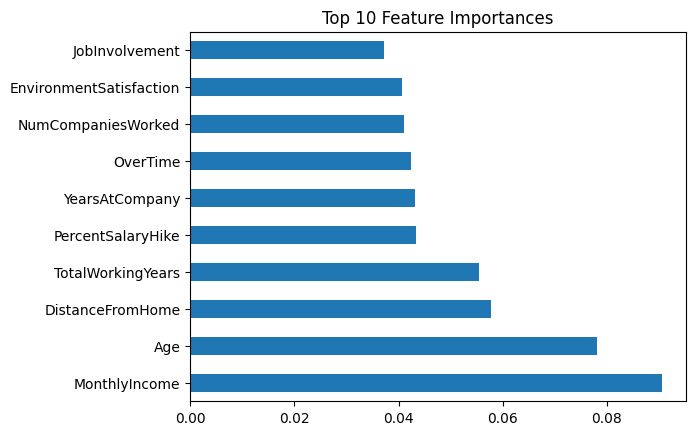

In [61]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()

Looking at the above plot based on the top 10 features, we can derive several important insights:
1. 'MonthlyIncome' is the top predictor/most important factor
    -  Employees with lower salaries might be more inclined to leave for better opportunities. High compensation can be a strong retention factor.
2. 'Age' and 'TotalWorkingYears' plays a significant role
    -  Younger employees or those with less experience might be more likely to leave in search of better growth opportunities. On the other hand, older or more experienced employees might expect career stability.
3. 'DistanceFromHome' is also an important factor
    -  Employees who live farther away from the office may be more prone to attrition due to long commutes. This can lead to higher burnout or dissatisfaction, especially in jobs that are physically demanding.
4. 'PercentSalaryHike' is a big factor in employee retention
    - Employees who receive consistent and significant raises may feel valued, while those who feel their compensation is stagnant might be more likely to leave.
5. 'YearsAtCompany'  is a direct measure of an employee's tenure
    -   Employees who have been at the company longer may be more committed or feel more loyal, but if they feel stagnant, they could also leave.
6. 'OverTime' has notable importance as well
    - Employees who work overtime frequently may experience burnout or work-life imbalance, leading them to seek employment elsewhere.
7. 'NumCompaniesWorked' is also quite important
    - The number of companies an employee has worked for can indicate job-hopping behavior. If employees tend to change jobs frequently, it could be a sign that they are dissatisfied or seeking better opportunities elsewhere.
8. 'EnvironmentSatisfaction' reflects the importance of the work environment
    -  A negative work environment can influence an employee's decision to leave, especially if they feel their workplace is toxic or lacks the necessary support.

The Random Forest model suggests that employees' income, age, commute distance, and tenure are the primary factors influencing attrition. Number of comapnies that they've worked at, overtime, and the work environment also play key roles, but not as much as the other features.
